In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import pandas as pd

In [2]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Dataset/ECG'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATADIR = '/content/drive/MyDrive/Colab Notebooks/DS2/ECG'
CATEGORIES = ['MI Patient', 'Normal']

In [5]:
IMG_SIZE = 100

training_data = []
Number_of_DATA_Per_Label = []
def create_training_data():
    for category in CATEGORIES: 
        counter = 0
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
                counter+=1   
            except Exception as e: 
                pass
        Number_of_DATA_Per_Label.append(counter)        

create_training_data()

print(len(training_data))

100%|██████████| 240/240 [01:34<00:00,  2.55it/s]

479


In [6]:
print(CATEGORIES)

['MI Patient', 'Normal']


In [7]:
print(Number_of_DATA_Per_Label)

[239, 240]


In [8]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
1
0
1
0
1


In [9]:
TD = np.array(training_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [10]:
print(TD[1: 10])

[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  1]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  0]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  1]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 2

In [11]:
dataset = pd.DataFrame({'Category': TD[:, 0], 'Label': TD[:, 1]})

In [12]:
print(dataset)

                                              Category Label
0    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
1    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
2    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
3    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
4    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
..                                                 ...   ...
474  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
475  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
476  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
477  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
478  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1

[479 rows x 2 columns]


In [13]:
dataset.head()

,Category,Label
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0


In [14]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    np.array((y, label))
    y.append(label)
    

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)


[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [15]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [17]:
x_train.shape

(359, 100, 100, 1)

In [18]:
y_train.shape

(359,)

In [19]:
x_test.shape

(120, 100, 100, 1)

In [20]:
y_test.shape

(120,)

In [21]:
X = X/255.0

dense_layers = [0]
layer_sizes = [128]
conv_layers = [1]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            BatchNormalization()
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='Adamax',
                          metrics=['accuracy'],
                          )

            history = model.fit(X, y, batch_size=40
                                , epochs=30, validation_split=0.2, callbacks=[tensorboard])

1-conv-128-nodes-0-dense-1633160025
Epoch 1/30
10/10 [==============================] - 6s 526ms/step - loss: 3.2165 - accuracy: 0.4099 - val_loss: 2.2650 - val_accuracy: 0.4896
Epoch 2/30
10/10 [==============================] - 5s 488ms/step - loss: 1.1800 - accuracy: 0.5718 - val_loss: 0.7316 - val_accuracy: 0.5104
Epoch 3/30
10/10 [==============================] - 5s 483ms/step - loss: 0.6980 - accuracy: 0.5561 - val_loss: 0.6157 - val_accuracy: 0.5625
Epoch 4/30
10/10 [==============================] - 5s 492ms/step - loss: 0.5942 - accuracy: 0.6632 - val_loss: 0.5543 - val_accuracy: 0.7812
Epoch 5/30
10/10 [==============================] - 5s 495ms/step - loss: 0.5068 - accuracy: 0.9060 - val_loss: 0.4799 - val_accuracy: 0.9479
Epoch 6/30
10/10 [==============================] - 5s 510ms/step - loss: 0.4296 - accuracy: 0.9399 - val_loss: 0.4270 - val_accuracy: 0.9271
Epoch 7/30
10/10 [==============================] - 5s 510ms/step - loss: 0.3730 - accuracy: 0.9687 - val_loss: 

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 307328)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 307329    
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 308,609
Trainable params: 308,609
Non-trainable params: 0
__________________________________________________

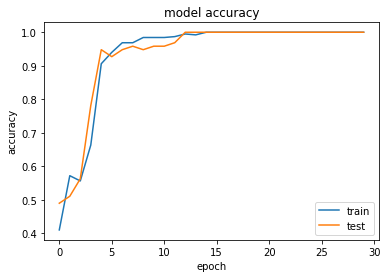

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

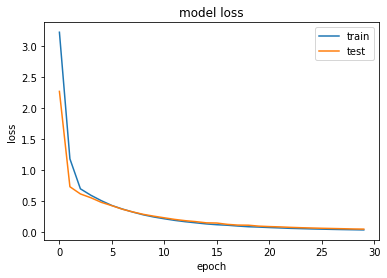

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

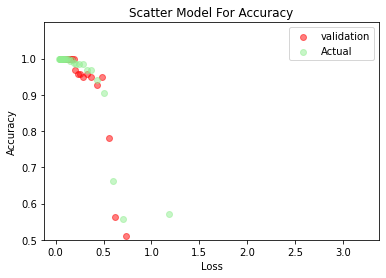

In [25]:
#faulty

#plt.figure(figsize=(8,8))
plt.scatter(history.history['val_loss'],history.history['val_accuracy'],label='validation',alpha= 0.5 , color = 'red' )
plt.scatter(history.history['loss'],history.history['accuracy'],label = 'Actual',alpha= 0.5 ,color = 'lightgreen')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.title('Scatter Model For Accuracy')
plt.legend(loc='upper right')
#plt.xticks(np.arange(0,10,3))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.ylim([0.5, 1.1])

plt.show()

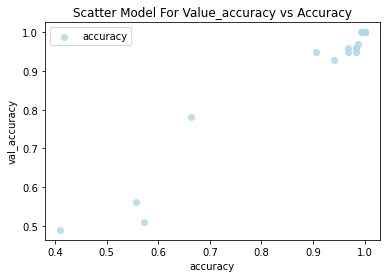

In [31]:
plt.scatter(history.history['accuracy'],history.history['val_accuracy'],label='accuracy' ,color ='lightblue' ,alpha= 0.8 , marker= 'o')

plt.ylabel('val_accuracy')
plt.xlabel('accuracy')
plt.title('Scatter Model For Value_accuracy vs Accuracy')
plt.legend(loc='upper left')
#plt.ylim([0.6, 0.7])

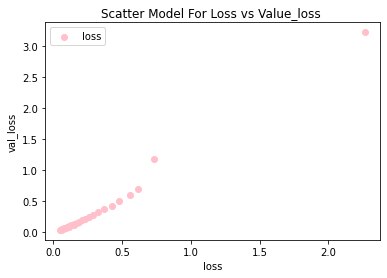

In [33]:
#faulty

plt.scatter(history.history['val_loss'],history.history['loss'],label='loss' ,color ='pink', marker= 'o')

plt.ylabel('val_loss')
plt.xlabel('loss')
plt.title('Scatter Model For Loss vs Value_loss ')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Scatter Model For accuracy vs loss')

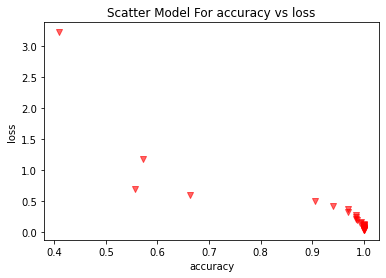

In [38]:
plt.scatter(history.history['accuracy'],history.history['loss'], alpha = 0.6, color ='red', marker= 'v')
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.title('Scatter Model For accuracy vs loss')


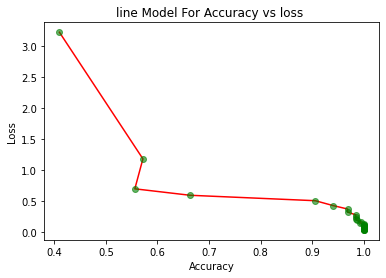

In [41]:
plt.plot(history.history['accuracy'],history.history['loss'] ,'r-')
plt.plot(history.history['accuracy'],history.history['loss'] ,'go',alpha=0.6)
#plt.plot(history.history['val_accuracy'],history.history['val_loss'],"g-")
#plt.plot(history.history['val_accuracy'],history.history['val_loss'],"ro")
plt.xlabel('Accuracy')
plt.ylabel('Loss')

plt.title('line Model For Accuracy vs loss ')
#plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

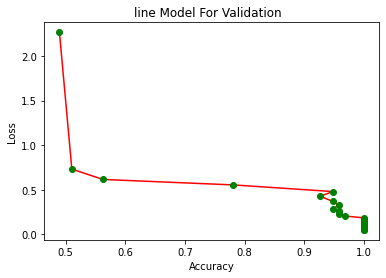

In [43]:
plt.plot(history.history['val_accuracy'],history.history['val_loss'],"r-")
plt.plot(history.history['val_accuracy'],history.history['val_loss'],"go")
plt.xlabel('Accuracy')
plt.ylabel('Loss')

plt.title('line Model For Validation  ')
#plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

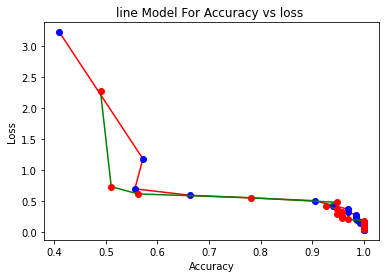

In [44]:
plt.plot(history.history['accuracy'],history.history['loss'] ,'r-')
plt.plot(history.history['accuracy'],history.history['loss'] ,'bo')
plt.plot(history.history['val_accuracy'],history.history['val_loss'],"g-")
plt.plot(history.history['val_accuracy'],history.history['val_loss'],"ro")
plt.xlabel('Accuracy')
plt.ylabel('Loss')

plt.title('line Model For Accuracy vs loss ')
#plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

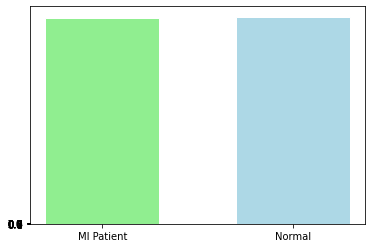

In [45]:
colors = ['lightgreen', 'lightblue']
plt.bar(CATEGORIES, Number_of_DATA_Per_Label, color = colors, width = 0.6, edgecolor = 'white')
plt.yticks(np.arange(0.0,1.1,0.1))
#plt.xticks(np.arange(0.0,11,1))

plt.show()

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        60
           1       0.00      0.00      0.00        60

    accuracy                           0.50       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.25      0.50      0.33       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


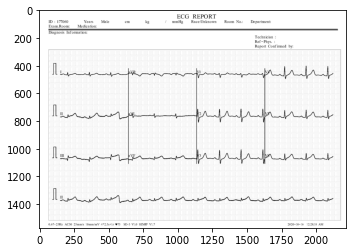

[[0.]]
MI Patient


In [49]:
def prepare(filepath):
    IMG_SIZE = 100  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_array, cmap='gray')  
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/DS2/ECG/MI Patient/MI(103).jpg')])
print(prediction)  
print(CATEGORIES[int(prediction[0][0])])

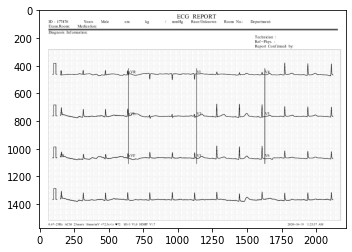

[[1.]]
Normal


In [50]:
def prepare(filepath):
    IMG_SIZE = 100  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_array, cmap='gray') 
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/DS2/ECG/Normal/Normal(102).jpg')])
print(prediction)  
print(CATEGORIES[int(prediction[0][0])])